TNSDC Naan Mudhalvan Project

Image Generation using GAN Model equipped with Generator and Discriminator

In [13]:
from keras.datasets.cifar10 import load_data
import matplotlib.pyplot as plt

(x_train,y_train),(x_test,y_test) = load_data()

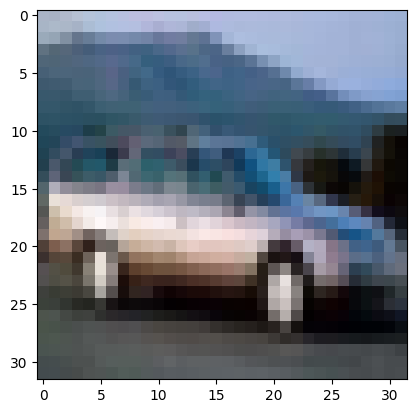

In [14]:
plt.imshow(x_train[4])

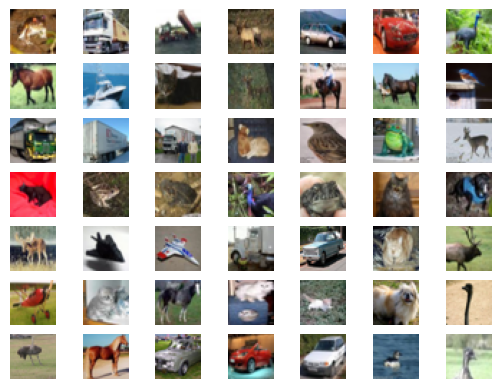

In [43]:
for i in range(49):

  plt.subplot(7,7,1+i)

  plt.axis('off')

  plt.imshow(x_train[i])

plt.show()

In [16]:
x_train.shape

(50000, 32, 32, 3)

In [17]:
!pip install keras-vis
import keras
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Flatten,LeakyReLU,Dropout
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
import numpy as np
from tensorflow.keras.utils import plot_model

In [18]:

def descriminator(in_shape = (32,32,3)):

  model = Sequential()

  model.add(Conv2D(64,(3,3),padding= "same" , input_shape = in_shape))
  model.add(LeakyReLU(alpha=0.2))

  model.add(Conv2D(128,(3,3),padding= "same" , strides=(2,2)))
  model.add(LeakyReLU(alpha=0.2))

  model.add(Conv2D(128,(3,3),padding= "same" , strides=(2,2)))
  model.add(LeakyReLU(alpha=0.2))

  model.add(Conv2D(256,(3,3),padding= "same" , strides=(2,2)))
  model.add(LeakyReLU(alpha=0.2))

  model.add(Flatten())
  model.add(Dropout(0.4))
  model.add(Dense(1,activation='sigmoid'))

  opt = Adam(lr=0.0002,beta_1=0.5)

  model.compile(optimizer = opt, loss = 'binary_crossentropy',metrics = ['accuracy'])

  return model

In [19]:
model = descriminator()

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 16, 16, 128)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 128)         147584    
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 8, 8, 128)         0         
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 256)         2

In [20]:
def load_real_sample():

  (x_train,_),(_,_) = load_data()

  x = x_train.astype('float32')

  x = (x-127.5)/127.5

  return x

In [21]:
x = load_real_sample()
x.shape

(50000, 32, 32, 3)

In [22]:
def generate_real_sample(dataset,n_sample):

  ix = np.random.randint(0,dataset.shape[0],n_sample)

  x = dataset[ix]
  y = np.ones((n_sample,1))

  return x,y

In [23]:
def generate_fake_sample(n_sample):

  x = np.random.rand(32 * 32 * 3 * n_sample)
  x = -1 + x * 2
  x = x.reshape((n_sample,32,32,3))

  y = np.zeros((n_sample,1))

  return x,y

In [44]:
x,y = generate_fake_sample(63)

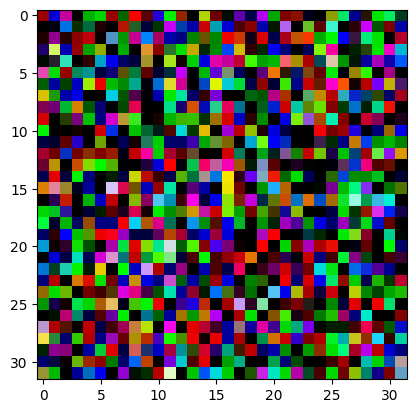

In [45]:
plt.imshow(x[0])

In [26]:
def train_descriminator(model,dataset,n_iter=20,n_batch=128):

  half_batch = n_batch//2

  for i in range(n_iter):

    x_real,y_real = generate_real_sample(dataset,half_batch)

    _,real_acc = model.train_on_batch(x_real,y_real)

    x_fake,y_fake = generate_fake_sample(half_batch)

    _,fake_acc = model.train_on_batch(x_fake,y_fake)

    print(f'{i+1} . real = {real_acc * 100}% , fake = {fake_acc * 100}% ')

In [27]:
model = descriminator()

dataset = load_real_sample()

train_descriminator(model,dataset)

1 . real = 67.1875% , fake = 0.0% 
2 . real = 100.0% , fake = 3.125% 
3 . real = 98.4375% , fake = 51.5625% 
4 . real = 85.9375% , fake = 100.0% 
5 . real = 100.0% , fake = 100.0% 
6 . real = 96.875% , fake = 100.0% 
7 . real = 100.0% , fake = 100.0% 
8 . real = 100.0% , fake = 100.0% 
9 . real = 100.0% , fake = 100.0% 
10 . real = 100.0% , fake = 100.0% 
11 . real = 100.0% , fake = 100.0% 
12 . real = 100.0% , fake = 100.0% 
13 . real = 100.0% , fake = 100.0% 
14 . real = 100.0% , fake = 100.0% 
15 . real = 100.0% , fake = 100.0% 
16 . real = 100.0% , fake = 100.0% 
17 . real = 100.0% , fake = 100.0% 
18 . real = 100.0% , fake = 100.0% 
19 . real = 100.0% , fake = 100.0% 
20 . real = 100.0% , fake = 100.0% 


In [28]:
from keras.models import Sequential
from keras.layers import Dense,Reshape,Conv2D,Conv2DTranspose,LeakyReLU

In [29]:
def generator(latent_dim):

  model = Sequential()

  n_nodes = 256 * 4 * 4

  model.add(Dense(n_nodes,input_dim = latent_dim))
  model.add(LeakyReLU(alpha = 0.2))
  model.add(Reshape((4,4,256)))

  model.add(Conv2DTranspose(128,(4,4),strides=(2,2),padding = 'same'))
  model.add(LeakyReLU(alpha=0.2))

  model.add(Conv2DTranspose(128,(4,4),strides=(2,2),padding = 'same'))
  model.add(LeakyReLU(alpha=0.2))

  model.add(Conv2DTranspose(128,(4,4),strides=(2,2),padding = 'same'))
  model.add(LeakyReLU(alpha=0.2))

  model.add(Conv2D(3,(3,3),activation='tanh',padding='same'))

  return model

In [58]:
model1 = generator(100)

model1.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 4096)              413696    
                                                                 
 leaky_re_lu_56 (LeakyReLU)  (None, 4096)              0         
                                                                 
 reshape_9 (Reshape)         (None, 4, 4, 256)         0         
                                                                 
 conv2d_transpose_27 (Conv2  (None, 8, 8, 128)         524416    
 DTranspose)                                                     
                                                                 
 leaky_re_lu_57 (LeakyReLU)  (None, 8, 8, 128)         0         
                                                                 
 conv2d_transpose_28 (Conv2  (None, 16, 16, 128)       262272    
 DTranspose)                                         

In [31]:
def generate_latent_points(latent_dim,n_sample):

  x_input = np.random.randn(latent_dim * n_sample)
  x_input = x_input.reshape(n_sample,latent_dim)

  return x_input

In [56]:
def generate_fake_sample_by_generator(g_model,latent_dim,n_sample):

  x_input = generate_latent_points(latent_dim,n_sample)

  x = g_model.predict(x_input)

  y = np.zeros((n_sample,1))

  return x,y

2/2 [==============================] - 0s 7ms/step


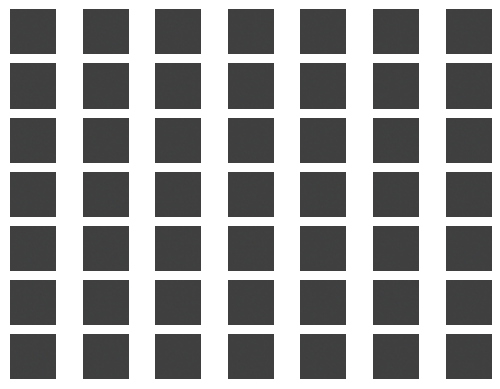

In [57]:
model = generator(100)

x,y = generate_fake_sample_by_generator(model,100,49)

x = (x+1)/4.0

for i in range(49):

  plt.subplot(7,7,1+i)

  plt.axis('off')

  plt.imshow(x[i])

plt.show()

In [34]:
def gan(g_model,d_model):

  d_model.trainable = False

  model = Sequential()

  model.add(g_model)

  model.add(d_model)

  opt = Adam(lr = 0.0002,beta_1 = 0.5)

  model.compile(optimizer = opt,loss = 'binary_crossentropy')

  return model

In [35]:
d_model = descriminator()

g_model = generator(100)

model = gan(g_model,d_model)

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_5 (Sequential)   (None, 32, 32, 3)         1466115   
                                                                 
 sequential_4 (Sequential)   (None, 1)                 522497    
                                                                 
Total params: 1988612 (7.59 MB)
Trainable params: 1466115 (5.59 MB)
Non-trainable params: 522497 (1.99 MB)
_________________________________________________________________


In [36]:
def train(g_model,d_model,gan_model,dataset,latent_dim,n_epochs=20,n_batch=128):

  batch_per_epoch = dataset.shape[0]//n_batch
  half_batch = n_batch//2

  for i in range(n_epochs):
    for j in range(batch_per_epoch):

      x_real,y_real = generate_real_sample(dataset,half_batch)

      d_loss1,_ = d_model.train_on_batch(x_real,y_real)

      x_fake,y_fake = generate_fake_sample_by_generator(g_model,latent_dim,half_batch)

      d_loss2,_ = d_model.train_on_batch(x_fake,y_fake)

      x_gan = generate_latent_points(latent_dim,n_batch)

      y_gan = np.ones((n_batch,1))

      g_loss = gan_model.train_on_batch(x_gan,y_gan)

      print(f'{i+1}. {j+1}/{batch_per_epoch} : d1 = {d_loss1} , d2 = {d_loss2} , g = {g_loss}')

    if (i+1)%10 == 0:
      summerize_function(i,g_model,d_model,dataset,latent_dim)


In [37]:
def summerize_function(i,g_model,d_model,dataset,latent_dim,n_samples = 150):

  x_real,y_real = generate_real_sample(dataset,n_samples)

  _,acc_real = d_model.evaluate(x_real,y_real)

  x_fake,y_fake = generate_fake_sample_by_generator(g_model,latent_dim,n_samples)

  _,acc_fake = d_model.evaluate(x_fake,y_fake)

  print(f'Descriminator Accuracy: Real = {acc_real} , Fake = {acc_fake}')

  save_plot(x_fake,i)

  filename = 'generator_model_%03d.h5' % (i+1)
  g_model.save(filename)

In [38]:
def save_plot(example,epoch,n=7):

  example = (example + 1)/2.0

  for i in range(n * n):
    plt.subplot(n,n,i+1)

    plt.axis('off')

    plt.imshow(example[i])

  filename = 'generated_plot_e%03d.png' % (epoch+1)

  plt.savefig(filename)
  plt.close()

In [49]:
d_model = descriminator()

g_model = generator(100)

gan_model = gan(g_model,d_model)



In [54]:
train(g_model,d_model,gan_model,dataset,latent_dim=100,n_epochs=20,n_batch=128)

2/2 [==============================] - 0s 7ms/step
1. 1/390 : d1 = 0.0 , d2 = 0.9102534055709839 , g = 209.87612915039062
2/2 [==============================] - 0s 6ms/step
1. 2/390 : d1 = 0.0 , d2 = 0.0 , g = 284.67156982421875
2/2 [==============================] - 0s 5ms/step
1. 3/390 : d1 = 0.0 , d2 = 0.0 , g = 307.962646484375
2/2 [==============================] - 0s 5ms/step
1. 4/390 : d1 = 2.868772506713867 , d2 = 0.0 , g = 192.9847412109375
2/2 [==============================] - 0s 6ms/step
1. 5/390 : d1 = 0.0 , d2 = 0.0 , g = 165.46856689453125
2/2 [==============================] - 0s 5ms/step
1. 6/390 : d1 = 0.0 , d2 = 0.0 , g = 153.7537078857422
2/2 [==============================] - 0s 5ms/step
1. 7/390 : d1 = 0.0 , d2 = 0.0 , g = 152.4231414794922
2/2 [==============================] - 0s 5ms/step
1. 8/390 : d1 = 0.0 , d2 = 0.0 , g = 150.92889404296875
2/2 [==============================] - 0s 4ms/step
1. 9/390 : d1 = 0.0 , d2 = 0.0 , g = 150.35751342773438
2/2 [========